Steps:

1. define the number of (K) of clusters to split the data into
2. select K random points within the data
3. calculate distance between centroids and other points
4. assign the points to the closest centroid
5. calculate the centr of each cluster
5. repeat steps 3-5

In [25]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline


# Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.



In [26]:
#Load data and display the first 5

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
#Drop CustomerID and Gender column and make permanent
#Dropping as CustomerID would not affect the outcome and I chose not to consider gender even though it could help understand the behaviours of each gender 

df.drop(columns=['CustomerID', 'Gender'], inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [28]:
#Check for missing values
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
#Check descriptive statistics
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Standardization of the data
To ensure each feature contributes equally to the distance metric
The formula for standardizing a data point 𝑥

𝑧 = 𝑥 − μ / 𝜎 

where:
z is the standardized value.
x is the original data point.
μ is the mean of the data set.
σ is the standard deviation of the data set.


In [30]:
scaler = StandardScaler()

In [31]:
#Create new dataframe with the scaled data

df[['Age_T', 'Annual Income (k$)_T']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)']])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Age_T,Annual Income (k$)_T
0,19,15,39,-1.424569,-1.738999
1,21,15,81,-1.281035,-1.738999
2,20,16,6,-1.352802,-1.700830
3,23,16,77,-1.137502,-1.700830
4,31,17,40,-0.563369,-1.662660


# Determine Optimum Value for k

In [58]:
def optimum_k_value(data, max_k):
    means = [] # the values of k
    inertias = [] # sum of squared errors
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        inertias.append(kmeans.inertia_)
        means.append(k)
        print(f'k:{k}, inertia:{kmeans.inertia_}')
    return means, inertias

In [59]:
optimum_k_value(df[['Age_T', 'Annual Income (k$)_T']], 20)

/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

k:1, inertia:400.0
k:2, inertia:250.58811570754693
k:3, inertia:132.8553042122192
k:4, inertia:103.05151849277249
k:5, inertia:81.40819144310571
k:6, inertia:67.36790953035509
k:7, inertia:54.16125645443167
k:8, inertia:48.03467063123222
k:9, inertia:41.571485172167776
k:10, inertia:37.56170048407982
k:11, inertia:33.08244940465558
k:12, inertia:30.0338946281573
k:13, inertia:26.56724596014544
k:14, inertia:25.02949210367651
k:15, inertia:22.617223317215107
k:16, inertia:21.222765583989457
k:17, inertia:20.06060619627349
k:18, inertia:18.307153965315194
k:19, inertia:17.05837302085555


/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [400.0,
  250.58811570754693,
  132.8553042122192,
  103.05151849277249,
  81.40819144310571,
  67.36790953035509,
  54.16125645443167,
  48.03467063123222,
  41.571485172167776,
  37.56170048407982,
  33.08244940465558,
  30.0338946281573,
  26.56724596014544,
  25.02949210367651,
  22.617223317215107,
  21.222765583989457,
  20.06060619627349,
  18.307153965315194,
  17.05837302085555])

/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

k:1, inertia:400.0
k:2, inertia:250.58811570754693
k:3, inertia:132.8553042122192
k:4, inertia:103.05151849277249
k:5, inertia:81.40819144310571
k:6, inertia:68.03038364149297
k:7, inertia:54.20134844042701
k:8, inertia:48.122314981226914
k:9, inertia:42.074102514788606
k:10, inertia:37.09976515625381
k:11, inertia:33.10955995037067
k:12, inertia:30.633257605952267
k:13, inertia:26.23193877244715
k:14, inertia:24.623971398957153
k:15, inertia:22.85812460969253
k:16, inertia:21.805367595364956
k:17, inertia:19.649024033381373
k:18, inertia:18.55637300940625
k:19, inertia:17.398278724563383


/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

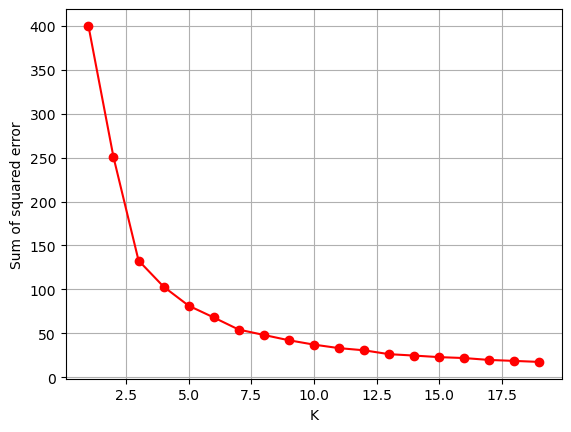

In [61]:
means, inertias = optimum_k_value(df[['Age_T', 'Annual Income (k$)_T']], 20)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(means, inertias, color='red', marker='o', linestyle='-')
plt.grid(True)
plt.show()

In [62]:
#Clustering

km = KMeans(n_clusters=5)
y_pred = km.fit_predict(df[['Age_T', 'Annual Income (k$)_T']])

/Users/emanueledelog/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [72]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 2, 3, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 3,
       3, 1, 2, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 2, 3, 1, 3, 2, 1, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 4, 1, 3, 4, 3, 4, 3, 4, 4, 1, 3,
       1, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [81]:
df['Clusters'] = y_pred
df

,Age,Annual Income (k$),Spending Score (1-100),Age_T,Annual Income (k$)_T,Clusters
0,19,15,39,-1.424569,-1.738999,0
1,21,15,81,-1.281035,-1.738999,0
2,20,16,6,-1.352802,-1.700830,0
3,23,16,77,-1.137502,-1.700830,0
4,31,17,40,-0.563369,-1.662660,0
...,...,...,...,...,...,...
195,35,120,79,-0.276302,2.268791,4
196,45,126,28,0.441365,2.497807,4
197,32,126,74,-0.491602,2.497807,4
198,32,137,18,-0.491602,2.917671,4


In [82]:
km.cluster_centers_ # x and y coordinates for each of the clusters 0 to 4

array([[-0.81371743, -1.17799735],
       [ 0.51639395,  0.30219778],
       [ 1.42995129, -0.63113151],
       [-0.86570478,  0.4017373 ],
       [-0.16313121,  1.68156888]])

<function matplotlib.pyplot.legend(*args, **kwargs)>

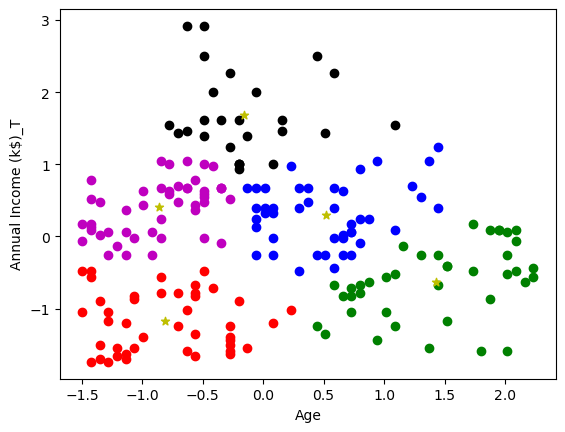

In [83]:
#Plot the Scatter plot

df1 = df[df.Clusters==0]
df2 = df[df.Clusters==1]
df3 = df[df.Clusters==2]
df4 = df[df.Clusters==3]
df5 = df[df.Clusters==4]

plt.scatter(df1.Age_T, df1['Annual Income (k$)_T'], color='r')
plt.scatter(df2.Age_T, df2['Annual Income (k$)_T'], color='b')
plt.scatter(df3.Age_T, df3['Annual Income (k$)_T'], color='g')
plt.scatter(df4.Age_T, df4['Annual Income (k$)_T'], color='m')
plt.scatter(df5.Age_T, df5['Annual Income (k$)_T'], color='k')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='y', marker="*", label='centroid')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)_T')
plt.legend